In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.3, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
pred = dt_clf.predict(X_test)

In [4]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import pandas as pd

print(f'정확도는 : {accuracy_score(y_test, pred)}')

정확도는 : 0.9333333333333333


In [6]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

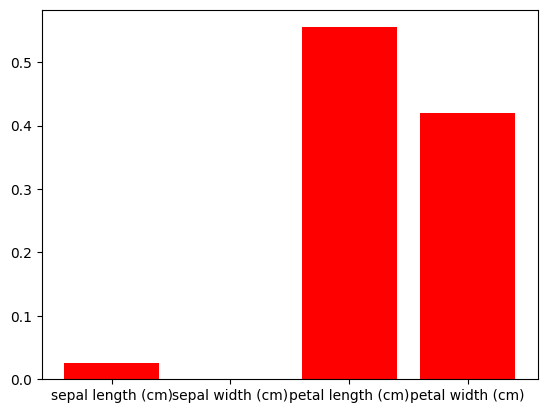

In [7]:
from xml.sax.handler import feature_namespaces
import matplotlib.pyplot as plt

plt.bar(iris_data.feature_names ,dt_clf.feature_importances_,color = 'red')
plt.show()

In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,\
    feature_names=iris_data.feature_names, impurity=True, filled=True)

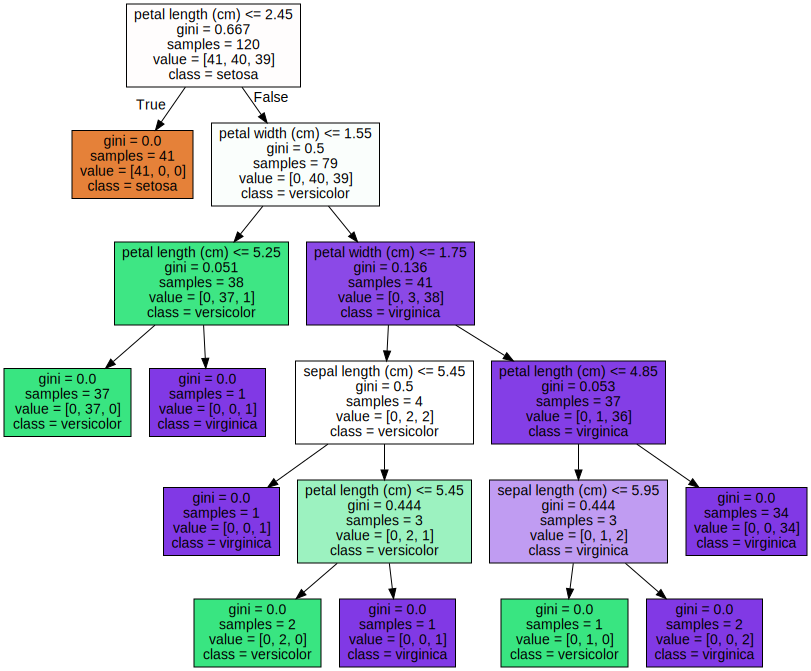

In [10]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

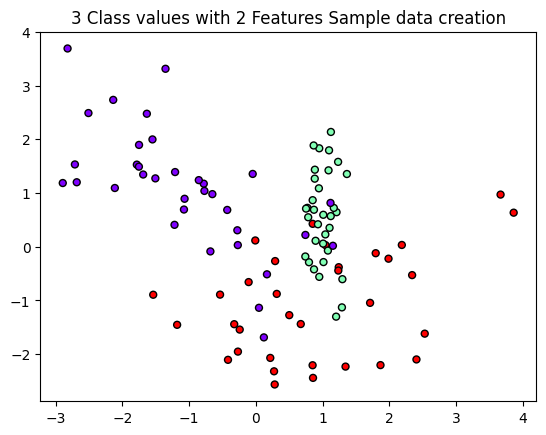

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker="o", c=y_labels, s=25, cmap="rainbow", edgecolor="k")


In [13]:
import numpy as np
from pyparsing import alphas

def visualze_boundary(model, X, y):
    fig,ax = plt.subplots()

    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap="rainbow", edgecolor="k",
               clim=(y.min(),y.max()),zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_xlim()

    model.fit(X,y)

    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end,num=200),np.linspace(ylim_start,ylim_end,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap = "rainbow", clim=(y.min(),y.max()),
                        zorder=1)

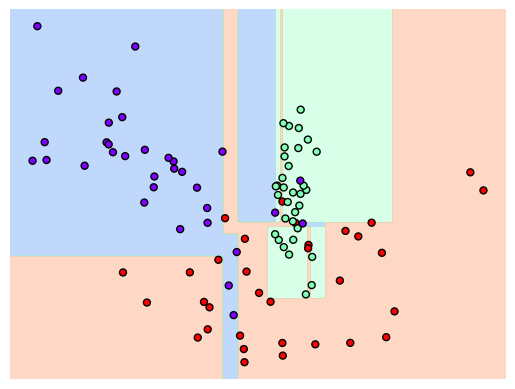

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualze_boundary(dt_clf,X_features,y_labels)

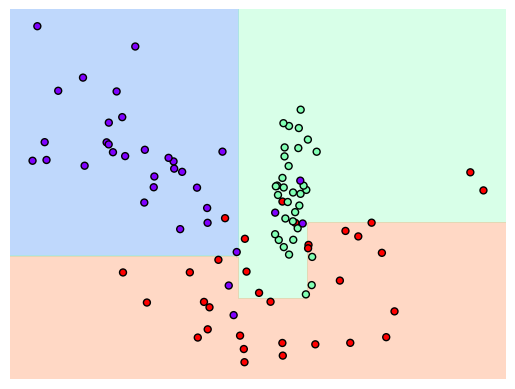

In [15]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualze_boundary(dt_clf, X_features, y_labels)

#### sklearn.datasets.load_breast_cancer
- sklearn.datasets.load_breast_cancer(*, return_X_y=False, as_frame=False)

In [19]:
import pandas as pd

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [20]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
rf_clf = RandomForestClassifier(random_state = 10)

vo_clf = VotingClassifier(estimators=[('Y',lr_clf),('K',knn_clf),('R',rf_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

classifiers = [lr_clf, knn_clf,rf_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier. __class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386
RandomForestClassifier 정확도 : 0.9561
